In [1]:
import numpy as np
import random
import re
from dataclasses import dataclass
from typing import List, Tuple
import vrplib

# 读取 CVRP 数据集
def read_cvrp_data(file_name, ending='.vrp'):
    if not file_name.endswith(ending):
        raise ValueError(f"File {file_name} does not have the expected {ending} extension.")

    instance = vrplib.read_instance(file_name)

    if not instance:
        raise ValueError(f"Failed to read {file_name}")

    print(f'Successfully read {file_name}')
    
    data = {}
    data["vehicle_capacity"] = instance['capacity']
    data["num_vehicles"] = int(re.search(r'k(\d+)', instance['name']).group(1))
    data["depot"] = 0
    data['locations'] = [tuple(row) for row in instance['node_coord']]
    data["num_locations"] = len(data["locations"])
    data['demand'] = instance['demand']
    data['distance_matrix'] = instance['edge_weight']
    
    return data

# 计算路径总距离
def total_distance(route: List[int], distance_matrix: np.ndarray) -> float:
    return sum(distance_matrix[i][j] for i, j in zip(route[:-1], route[1:]))

# 初始化种群
def initialize_population(data: dict, population_size: int) -> List[List[List[int]]]:
    population = []
    for _ in range(population_size):
        routes = []
        unvisited = set(range(len(data['demand']))) - {data['depot']}

        while unvisited:
            route = [data['depot']]
            current_load = 0

            while True:
                candidates = [
                    n for n in unvisited
                    if data['demand'][n] + current_load <= data['vehicle_capacity']
                ]
                if not candidates:
                    break

                next_node = random.choice(candidates)
                route.append(next_node)
                current_load += data['demand'][next_node]
                unvisited.remove(next_node)

            route.append(data['depot'])
            routes.append(route)

        population.append(routes)

    return population

# 适应度函数
def fitness(individual: List[List[int]], data: dict) -> float:
    # 适应度为总路径距离（越小越好）
    return sum(total_distance(route, data['distance_matrix']) for route in individual)

# 选择操作
def select(population: List[List[List[int]]], data: dict, num_parents: int) -> List[List[List[int]]]:
    fitness_values = [fitness(individual, data) for individual in population]
    selected_parents = np.argsort(fitness_values)[:num_parents]
    return [population[i] for i in selected_parents]

# 交叉操作
def crossover(parent1: List[List[int]], parent2: List[List[int]]) -> List[List[int]]:
    crossover_point = random.randint(1, len(parent1) - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

# 变异操作
def mutate(individual: List[List[int]], data: dict, mutation_rate: float) -> List[List[int]]:
    if random.random() < mutation_rate:
        route_index = random.randint(0, len(individual) - 1)
        route = individual[route_index]
        
        # 变换一个随机路径
        swap_idx1 = random.randint(1, len(route) - 2)
        swap_idx2 = random.randint(1, len(route) - 2)
        
        route[swap_idx1], route[swap_idx2] = route[swap_idx2], route[swap_idx1]
    
    return individual

# 遗传算法主函数
def genetic_algorithm(data: dict, population_size: int, num_generations: int, mutation_rate: float, num_parents: int) -> List[List[int]]:
    population = initialize_population(data, population_size)

    for generation in range(num_generations):
        print(f"Generation {generation}")
        
        # 选择操作
        parents = select(population, data, num_parents)

        # 交叉操作
        children = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i + 1] if i + 1 < len(parents) else parents[i]
            child = crossover(parent1, parent2)
            children.append(child)

        # 变异操作
        next_generation = []
        for child in children:
            mutated_child = mutate(child, data, mutation_rate)
            next_generation.append(mutated_child)

        population = parents + next_generation

    # 选择最好的解
    best_individual = min(population, key=lambda x: fitness(x, data))
    return best_individual


file_name = "cvrp-funsearch/cvrp/data/small/A-n32-k5.vrp"
data = read_cvrp_data(file_name)

# 参数设置
population_size = 5000
num_generations = 1000
mutation_rate = 0.3
num_parents = 50

# 运行遗传算法
best_solution = genetic_algorithm(data, population_size, num_generations, mutation_rate, num_parents)

# 输出最优解
print("Best solution:", best_solution)
print("Total distance:", fitness(best_solution, data))


Successfully read cvrp-funsearch/cvrp/data/small/A-n32-k5.vrp
Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62
Generation 63
Generation 64
Generation 65
Generation 66
Generation

In [7]:
import numpy as np
import random
import re
from dataclasses import dataclass
from typing import List, Tuple
import vrplib

# 读取 CVRP 数据集
def read_cvrp_data(file_name, ending='.vrp'):
    if not file_name.endswith(ending):
        raise ValueError(f"File {file_name} does not have the expected {ending} extension.")

    instance = vrplib.read_instance(file_name)

    if not instance:
        raise ValueError(f"Failed to read {file_name}")

    print(f'Successfully read {file_name}')
    
    data = {}
    data["vehicle_capacity"] = instance['capacity']
    data["num_vehicles"] = int(re.search(r'k(\d+)', instance['name']).group(1))
    data["depot"] = 0
    data['locations'] = [tuple(row) for row in instance['node_coord']]
    data["num_locations"] = len(data["locations"])
    data['demand'] = instance['demand']
    data['distance_matrix'] = instance['edge_weight']
    
    return data

# 计算路径总距离
def total_distance(route: List[int], distance_matrix: np.ndarray) -> float:
    return sum(distance_matrix[i][j] for i, j in zip(route[:-1], route[1:]))

# 检查解的可行性
def is_valid_solution(individual: List[List[int]], data: dict) -> bool:
    visited = set()
    for route in individual:
        if route[0] != data['depot'] or route[-1] != data['depot']:
            return False
        route_demand = sum(data['demand'][n] for n in route[1:-1])
        if route_demand > data['vehicle_capacity']:
            return False
        visited.update(route[1:-1])
    return len(visited) == data['num_locations'] - 1 and len(individual) <= data['num_vehicles']

# 初始化种群
def initialize_population(data: dict, population_size: int) -> List[List[List[int]]]:
    population = []
    all_customers = list(range(1, data['num_locations']))

    for _ in range(population_size):
        routes = []
        customers = all_customers.copy()
        random.shuffle(customers)
        
        current_route = [data['depot']]
        current_load = 0
        
        for customer in customers:
            if current_load + data['demand'][customer] <= data['vehicle_capacity'] and len(routes) < data['num_vehicles']:
                current_route.append(customer)
                current_load += data['demand'][customer]
            else:
                current_route.append(data['depot'])
                routes.append(current_route)
                current_route = [data['depot'], customer]
                current_load = data['demand'][customer]
        
        if current_route != [data['depot']]:
            current_route.append(data['depot'])
            routes.append(current_route)
        
        population.append(routes)

    return population

# 适应度函数
def fitness(individual: List[List[int]], data: dict) -> float:
    if not is_valid_solution(individual, data):
        return float('inf')
    
    total_dist = sum(total_distance(route, data['distance_matrix']) for route in individual)
    
    # 惩罚超载和超车辆数
    penalty = 0
    for route in individual:
        total_demand = sum(data['demand'][n] for n in route[1:-1])
        if total_demand > data['vehicle_capacity']:
            penalty += (total_demand - data['vehicle_capacity']) * 100
    if len(individual) > data['num_vehicles']:
        penalty += (len(individual) - data['num_vehicles']) * 1000
    
    return total_dist + penalty

# 选择操作（锦标赛选择）
def select(population: List[List[List[int]]], data: dict, num_parents: int) -> List[List[List[int]]]:
    selected = []
    tournament_size = 5
    
    for _ in range(num_parents):
        tournament = random.sample(population, min(tournament_size, len(population)))
        winner = min(tournament, key=lambda x: fitness(x, data))
        selected.append(winner)
    
    return selected

# 交叉操作
def crossover(parent1: List[List[int]], parent2: List[List[int]], data: dict) -> List[List[int]]:
    # 提取所有客户节点
    customers1 = []
    for route in parent1:
        customers1.extend(route[1:-1])
    
    # 选择 parent1 的一个子集
    start = random.randint(0, len(customers1) - 1)
    end = random.randint(start + 1, len(customers1))
    child_subset = customers1[start:end]
    
    # 从 parent2 填充剩余客户
    remaining = []
    for route in parent2:
        for node in route[1:-1]:
            if node not in child_subset:
                remaining.append(node)
    
    # 构建子代
    child_customers = child_subset + remaining
    child_routes = []
    current_route = [data['depot']]
    current_load = 0
    
    for customer in child_customers:
        if current_load + data['demand'][customer] <= data['vehicle_capacity'] and len(child_routes) < data['num_vehicles']:
            current_route.append(customer)
            current_load += data['demand'][customer]
        else:
            current_route.append(data['depot'])
            child_routes.append(current_route)
            current_route = [data['depot'], customer]
            current_load = data['demand'][customer]
    
    if current_route != [data['depot']]:
        current_route.append(data['depot'])
        child_routes.append(current_route)
    
    return child_routes

# 变异操作
def mutate(individual: List[List[int]], data: dict, mutation_rate: float) -> List[List[int]]:
    if random.random() < mutation_rate:
        # 选择变异类型： intra-route swap 或 inter-route move
        if random.random() < 0.5 and len(individual) > 0:
            # Intra-route swap
            route_idx = random.randint(0, len(individual) - 1)
            route = individual[route_idx]
            if len(route) > 3:  # 确保有足够的节点
                idx1, idx2 = random.sample(range(1, len(route) - 1), 2)
                route[idx1], route[idx2] = route[idx2], route[idx1]
        else:
            # Inter-route move
            if len(individual) > 1:
                route1_idx, route2_idx = random.sample(range(len(individual)), 2)
                route1, route2 = individual[route1_idx], individual[route2_idx]
                if len(route1) > 3:  # 确保 route1 有客户
                    customer_idx = random.randint(1, len(route1) - 2)
                    customer = route1[customer_idx]
                    if sum(data['demand'][n] for n in route2[1:-1]) + data['demand'][customer] <= data['vehicle_capacity']:
                        route1.pop(customer_idx)
                        route2.insert(-1, customer)
                        if len(route1) == 2:  # 移除空路径
                            individual.pop(route1_idx)
    
    return individual

# 遗传算法主函数
def genetic_algorithm(data: dict, population_size: int, num_generations: int, mutation_rate: float, num_parents: int, elite_size: int) -> List[List[int]]:
    population = initialize_population(data, population_size)

    for generation in range(num_generations):
        print(f"Generation {generation}")
        
        # 选择操作
        parents = select(population, data, num_parents)

        # 交叉操作
        children = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i + 1] if i + 1 < len(parents) else random.choice(parents)
            child = crossover(parent1, parent2, data)
            children.append(child)

        # 变异操作
        for i in range(len(children)):
            children[i] = mutate(children[i], data, mutation_rate)

        # 精英策略
        population = sorted(population, key=lambda x: fitness(x, data))[:elite_size] + children + parents
        population = population[:population_size]  # 控制种群大小

    # 选择最好的解
    best_individual = min(population, key=lambda x: fitness(x, data))
    return best_individual

# 主代码
if __name__ == '__main__':
    # 读取数据
    file_name = "cvrp-funsearch/cvrp/data/small/A-n32-k5.vrp"
    data = read_cvrp_data(file_name)

    # 参数设置
    population_size = 500
    num_generations = 2000
    mutation_rate = 0.1
    num_parents = 50
    elite_size = 5

    # 运行遗传算法
    best_solution = genetic_algorithm(data, population_size, num_generations, mutation_rate, num_parents, elite_size)

    # 输出最优解
    print("Best solution:", best_solution)
    print("Total distance:", fitness(best_solution, data))

Successfully read cvrp-funsearch/cvrp/data/small/A-n32-k5.vrp
Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62
Generation 63
Generation 64
Generation 65
Generation 66
Generation

Successfully read cvrp-funsearch/cvrp/data/small/A-n80-k10.vrp


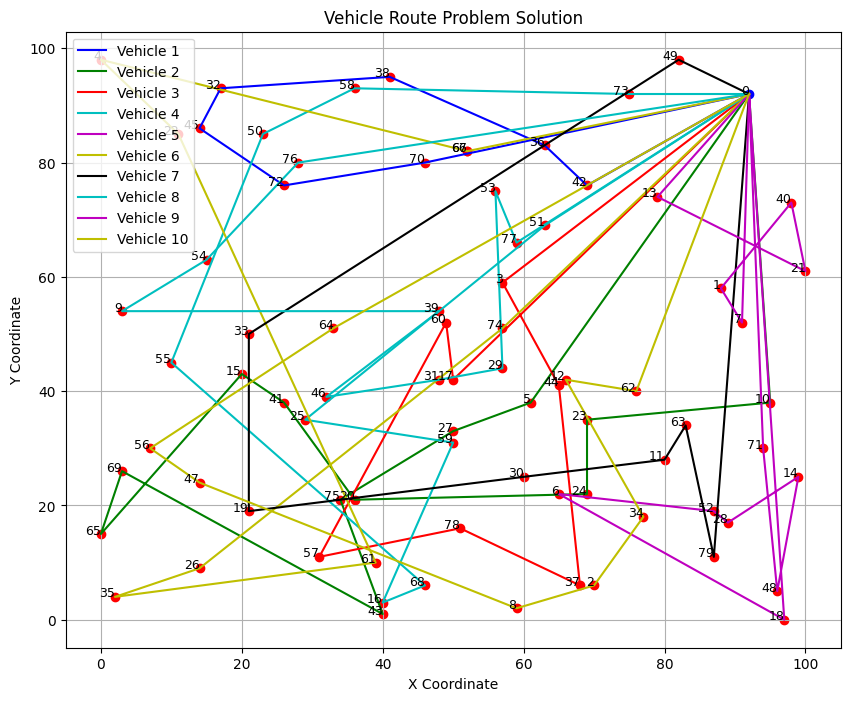

In [5]:

from matplotlib import pyplot as plt
data = read_cvrp_data(file_name)

def plot_CVRP_solution(routes, node_coords):

    plt.figure(figsize= (10,8))

    # plot nodes
    for i, (x,y) in enumerate(node_coords):
        plt.scatter(x,y, c = 'blue' if i ==0 else 'red')
        plt.text(x,y, f'{i}', fontsize = 9, ha='right')

    
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','c', 'm', 'y', 'k']

    for vehicle, route in enumerate(routes):
        route_coords = [node_coords[0]] + [node_coords[node] for node in route] + [node_coords[0]]
        x_coords, y_coords = zip(*route_coords)
        plt.plot(x_coords, y_coords, c= colors[vehicle % len(colors)], label=f'Vehicle {vehicle +1}')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Route Problem Solution')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_CVRP_solution(best_solution,data["locations"])

In [ ]:
import numpy as np
import random
import re
from dataclasses import dataclass
from typing import List, Tuple
import vrplib

# 读取 CVRP 数据集
def read_cvrp_data(file_name, ending='.vrp'):
    if not file_name.endswith(ending):
        raise ValueError(f"File {file_name} does not have the expected {ending} extension.")

    instance = vrplib.read_instance(file_name)

    if not instance:
        raise ValueError(f"Failed to read {file_name}")

    print(f'Successfully read {file_name}')
    
    data = {}
    data["vehicle_capacity"] = instance['capacity']
    data["num_vehicles"] = int(re.search(r'k(\d+)', instance['name']).group(1))
    data["depot"] = 0
    data['locations'] = [tuple(row) for row in instance['node_coord']]
    data["num_locations"] = len(data["locations"])
    data['demand'] = instance['demand']
    data['distance_matrix'] = instance['edge_weight']
    
    return data

# 计算路径总距离
def total_distance(route: List[int], distance_matrix: np.ndarray) -> float:
    return sum(distance_matrix[i][j] for i, j in zip(route[:-1], route[1:]))

# 检查解的可行性
def is_valid_solution(individual: List[List[int]], data: dict) -> bool:
    visited = set()
    for route in individual:
        if route[0] != data['depot'] or route[-1] != data['depot']:
            return False
        route_demand = sum(data['demand'][n] for n in route[1:-1])
        if route_demand > data['vehicle_capacity']:
            return False
        visited.update(route[1:-1])
    return len(visited) == data['num_locations'] - 1 and len(individual) <= data['num_vehicles']

# 初始化种群
def initialize_population(data: dict, population_size: int) -> List[List[List[int]]]:
    population = []
    all_customers = list(range(1, data['num_locations']))

    for _ in range(population_size):
        routes = []
        customers = all_customers.copy()
        random.shuffle(customers)
        
        current_route = [data['depot']]
        current_load = 0
        
        for customer in customers:
            if current_load + data['demand'][customer] <= data['vehicle_capacity'] and len(routes) < data['num_vehicles']:
                current_route.append(customer)
                current_load += data['demand'][customer]
            else:
                current_route.append(data['depot'])
                routes.append(current_route)
                current_route = [data['depot'], customer]
                current_load = data['demand'][customer]
        
        if current_route != [data['depot']]:
            current_route.append(data['depot'])
            routes.append(current_route)
        
        population.append(routes)

    return population

# 适应度函数
def fitness(individual: List[List[int]], data: dict) -> float:
    if not is_valid_solution(individual, data):
        return float('inf')
    
    total_dist = sum(total_distance(route, data['distance_matrix']) for route in individual)
    
    # 惩罚超载和超车辆数
    penalty = 0
    for route in individual:
        total_demand = sum(data['demand'][n] for n in route[1:-1])
        if total_demand > data['vehicle_capacity']:
            penalty += (total_demand - data['vehicle_capacity']) * 100
    if len(individual) > data['num_vehicles']:
        penalty += (len(individual) - data['num_vehicles']) * 1000
    
    return total_dist + penalty

# 选择操作（锦标赛选择）
def select(population: List[List[List[int]]], data: dict, num_parents: int) -> List[List[List[int]]]:
    selected = []
    tournament_size = 5
    
    for _ in range(num_parents):
        tournament = random.sample(population, min(tournament_size, len(population)))
        winner = min(tournament, key=lambda x: fitness(x, data))
        selected.append(winner)
    
    return selected

# 交叉操作
def crossover(parent1: List[List[int]], parent2: List[List[int]], data: dict) -> List[List[int]]:
    # 提取所有客户节点
    customers1 = []
    for route in parent1:
        customers1.extend(route[1:-1])
    
    # 选择 parent1 的一个子集
    start = random.randint(0, len(customers1) - 1)
    end = random.randint(start + 1, len(customers1))
    child_subset = customers1[start:end]
    
    # 从 parent2 填充剩余客户
    remaining = []
    for route in parent2:
        for node in route[1:-1]:
            if node not in child_subset:
                remaining.append(node)
    
    # 构建子代
    child_customers = child_subset + remaining
    child_routes = []
    current_route = [data['depot']]
    current_load = 0
    
    for customer in child_customers:
        if current_load + data['demand'][customer] <= data['vehicle_capacity'] and len(child_routes) < data['num_vehicles']:
            current_route.append(customer)
            current_load += data['demand'][customer]
        else:
            current_route.append(data['depot'])
            child_routes.append(current_route)
            current_route = [data['depot'], customer]
            current_load = data['demand'][customer]
    
    if current_route != [data['depot']]:
        current_route.append(data['depot'])
        child_routes.append(current_route)
    
    return child_routes

# 变异操作
def mutate(individual: List[List[int]], data: dict, mutation_rate: float) -> List[List[int]]:
    if random.random() < mutation_rate:
        # 选择变异类型： intra-route swap 或 inter-route move
        if random.random() < 0.5 and len(individual) > 0:
            # Intra-route swap
            route_idx = random.randint(0, len(individual) - 1)
            route = individual[route_idx]
            if len(route) > 3:  # 确保有足够的节点
                idx1, idx2 = random.sample(range(1, len(route) - 1), 2)
                route[idx1], route[idx2] = route[idx2], route[idx1]
        else:
            # Inter-route move
            if len(individual) > 1:
                route1_idx, route2_idx = random.sample(range(len(individual)), 2)
                route1, route2 = individual[route1_idx], individual[route2_idx]
                if len(route1) > 3:  # 确保 route1 有客户
                    customer_idx = random.randint(1, len(route1) - 2)
                    customer = route1[customer_idx]
                    if sum(data['demand'][n] for n in route2[1:-1]) + data['demand'][customer] <= data['vehicle_capacity']:
                        route1.pop(customer_idx)
                        route2.insert(-1, customer)
                        if len(route1) == 2:  # 移除空路径
                            individual.pop(route1_idx)
    
    return individual

# 遗传算法主函数
def genetic_algorithm(data: dict, population_size: int, num_generations: int, mutation_rate: float, num_parents: int, elite_size: int) -> List[List[int]]:
    population = initialize_population(data, population_size)

    for generation in range(num_generations):
        print(f"Generation {generation}")
        
        # 选择操作
        parents = select(population, data, num_parents)

        # 交叉操作
        children = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i + 1] if i + 1 < len(parents) else random.choice(parents)
            child = crossover(parent1, parent2, data)
            children.append(child)

        # 变异操作
        for i in range(len(children)):
            children[i] = mutate(children[i], data, mutation_rate)

        # 精英策略
        population = sorted(population, key=lambda x: fitness(x, data))[:elite_size] + children + parents
        population = population[:population_size]  # 控制种群大小

    # 选择最好的解
    best_individual = min(population, key=lambda x: fitness(x, data))
    return best_individual
